# Cohort Analysis with Python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Summary


We are given an [online retail](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II) dataset containing transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.  
  
We are tasked to determine cohorts based on user retention and to provide insights and recommendations to improve customer loyalty.  

# Load and clean the online retail dataset.

In [ ]:
# We set Invoice and Customer ID as string types since they are the keys/ID for our dataset.
df = pd.read_csv('/content/drive/MyDrive/online_retail.csv',
                   dtype={'Invoice':str, 'Customer ID':str},
                   parse_dates=['InvoiceDate'])
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom


import numpy as np
from google.colab import autoviz
df_5715666717249429062 = autoviz.get_df('df_5715666717249429062')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5715666717249429062, *['Quantity'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8341215954708932478 = autoviz.get_df('df_8341215954708932478')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8341215954708932478, *['Price'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4437222526445133633 = autoviz.get_df('df_4437222526445133633')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4437222526445133633, *['Quantity'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4234033284860007790 = autoviz.get_df('df_4234033284860007790')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4234033284860007790, *['Price'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1294820519369674137 = autoviz.get_df('df_1294820519369674137')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_1294820519369674137, *[[['Quantity', 'Price']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_1226852001052041276 = autoviz.get_df('df_1226852001052041276')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1226852001052041276, *['InvoiceDate', 'Quantity', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_3172708782832074470 = autoviz.get_df('df_3172708782832074470')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3172708782832074470, *['InvoiceDate', 'Price', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6664432291704414346 = autoviz.get_df('df_6664432291704414346')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6664432291704414346, *['InvoiceDate', 'count()', None], **{})
chart

In [ ]:
# we are only interested in customers who first purchased on December 2009
# get list of customers first
customers = df.loc[df.InvoiceDate < datetime.datetime(2010,1,1), 'Customer ID'].unique()

# print(customers)
print(customers)

['13085' '13078' '15362' ... '14477' '14151' '12539']


In [ ]:
# filter the transactions
df = df[df['Customer ID'].isin(customers)]

print(customers)

['13085' '13078' '15362' ... '14477' '14151' '12539']


In [ ]:
# remove cancellations (Invoices Starts with C)
df = df[~df['Invoice'].str.startswith("C")]

print(df["Invoice"])

0         489434
1         489434
2         489434
3         489434
4         489434
           ...  
525456    538171
525457    538171
525458    538171
525459    538171
525460    538171
Name: Invoice, Length: 303275, dtype: object


In [ ]:
# remove null customer IDs
df = df.dropna(subset=["Customer ID"])

# without needing the subset parameter
# df['Customer ID'].dropna()

In [ ]:
# Add new columns to extract the year and the month
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

In [ ]:
df_monthly = df.groupby(['Year', 'Month', ])['Invoice'].nunique()

print(len(df_monthly.index))

13


# Create cohorts using customers with first purchase on December 2009. Group them by transaction count and generate a retention matrix.


In [ ]:
# remove duplicates
df_cohorts = df[['Customer ID', 'Invoice', 'InvoiceDate']].drop_duplicates()

In [ ]:
# all first transaction month is December 2009
df_cohorts['first_txn'] = datetime.datetime(2009, 12, 1)
# convert to year-month
df_cohorts['first_txn'] = df_cohorts['first_txn'].dt.to_period('M')

In [ ]:
df_cohorts.head(10)

,Customer ID,Invoice,InvoiceDate,first_txn
0,13085,489434,2009-12-01 07:45:00,2009-12
8,13085,489435,2009-12-01 07:46:00,2009-12
12,13078,489436,2009-12-01 09:06:00,2009-12
31,15362,489437,2009-12-01 09:08:00,2009-12
54,18102,489438,2009-12-01 09:24:00,2009-12
71,12682,489439,2009-12-01 09:28:00,2009-12
90,18087,489440,2009-12-01 09:43:00,2009-12
92,18087,489441,2009-12-01 09:44:00,2009-12
96,13635,489442,2009-12-01 09:46:00,2009-12
119,14110,489443,2009-12-01 09:50:00,2009-12


In [ ]:
# Add column for transaction count
# group by Customer ID and rank by ascending InvoiceDate
df_cohorts['txn_count'] = df_cohorts.groupby("Customer ID")['InvoiceDate'].rank(method='first')
df_cohorts.head(10)

,Customer ID,Invoice,InvoiceDate,first_txn,txn_count
0,13085,489434,2009-12-01 07:45:00,2009-12,1.0
8,13085,489435,2009-12-01 07:46:00,2009-12,2.0
12,13078,489436,2009-12-01 09:06:00,2009-12,1.0
31,15362,489437,2009-12-01 09:08:00,2009-12,1.0
54,18102,489438,2009-12-01 09:24:00,2009-12,1.0
71,12682,489439,2009-12-01 09:28:00,2009-12,1.0
90,18087,489440,2009-12-01 09:43:00,2009-12,1.0
92,18087,489441,2009-12-01 09:44:00,2009-12,2.0
96,13635,489442,2009-12-01 09:46:00,2009-12,1.0
119,14110,489443,2009-12-01 09:50:00,2009-12,1.0


In [ ]:
df_cohorts['txn_month'] = df_cohorts['InvoiceDate'].dt.to_period('M')

In [ ]:
# Group by transaction count, transaction month, first transaction date
df_cohorts = df_cohorts.groupby(['txn_count', 'txn_month', 'first_txn'])['Customer ID'].nunique()
df_cohorts.name = 'num_customers'
df_cohorts = df_cohorts.reset_index()

In [ ]:
# subtract first_txn from txn_month, this will result in a MonthEnd pandas datatype
# to get the value as integer, we use the pandas apply function
df_cohorts['period_number'] = (df_cohorts.txn_month - df_cohorts.first_txn).apply(lambda x: x.n)
df_cohorts.head(10)

,txn_count,txn_month,first_txn,num_customers,period_number
0,1.0,2009-12,2009-12,955,0
1,1.0,2010-01,2009-12,18,1
2,1.0,2010-02,2009-12,15,2
3,1.0,2010-03,2009-12,14,3
4,1.0,2010-04,2009-12,9,4
5,1.0,2010-05,2009-12,2,5
6,1.0,2010-06,2009-12,6,6
7,1.0,2010-07,2009-12,2,7
8,1.0,2010-08,2009-12,1,8
9,1.0,2010-09,2009-12,1,9


In [ ]:
df_pivot = df_cohorts.pivot_table(index='first_txn', columns='period_number', values='num_customers')

In [ ]:
df_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
first_txn,,,,,,,,,,,,,
2009-12,100.866667,17.909091,16.333333,14.326923,10.66129,10.370968,8.855263,6.755319,6.315217,5.163121,6.153846,7.0,3.393162


In [ ]:
# get the original cohort size - based on how many customers have a given txn_count
df_orig_cohorts = df_pivot[0]
df_orig_cohorts

first_txn
2009-12    0.47111
Freq: M, Name: 0, dtype: float64

In [ ]:
# divide by original cohort size
df_pivot = df_pivot.divide(df_orig_cohorts, axis=0)

In [ ]:
df_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
first_txn,,,,,,,,,,,,,
2009-12,1.0,0.177552,0.16193,0.142038,0.105697,0.102819,0.087792,0.066973,0.06261,0.051188,0.06101,0.069399,0.03364


# insights and observations on the resulting matrix. What recommendations


In [ ]:
import matplotlib
import numpy as np

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for _, spine in ax.spines.items():
      spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

Text(0.5, 0, 'Periods')

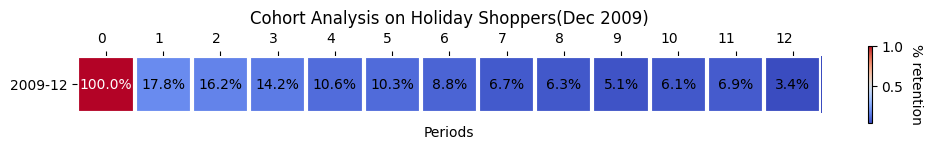

In [ ]:
fig, ax = plt.subplots(figsize=(12,1))

im, cbar = heatmap(df_pivot.values, df_pivot.index, df_pivot.columns, ax=ax,
                   cmap="coolwarm", cbarlabel="% retention")
texts = annotate_heatmap(im, valfmt="{x:.1%}")

ax.set_title('Cohort Analysis on Holiday Shoppers(Dec 2009)')
ax.set_xlabel('Periods')

#Conclusion and Recomendation

We use python to plot a heatmap to visualize and analyze our customers, with this we are able to analyze the cohorts based on their action from the first transaction (in December 2009) through the following periods.

Base on the heatmap we received the slightly unidentical result compare to the last excercise, because the retention percentage of the costumers are going down after periods. One more thing that i noticed is that there are no sign of recovering because the decline of % from every period is consistent.

This concludes that the store is very vulnerable in lossing customers by months and this can cause a large amount of loss in the company.

I recomend that the staff and owner should discuss this in a meeting and create a plan to resolve the problem.
